<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Regression with Tensorflow & Keras

------


### OBJECTIVES

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save the model

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

# Sequential allows us to build neural networks by stacking layers linearly
from tensorflow.keras.models import Sequential

# Import core layer types from Keras:
# - Dense: Standard fully-connected neural network layer
# - Dropout: Randomly sets input units to 0 during training (prevents overfitting)
# - BatchNormalization: Normalizes and scales inputs for each mini-batch (improves training stability)
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping

# Import regularization functions from Keras:
# - l1: Lasso Regularization (adds absolute value of weights to loss)
# - l2: Ridge Regularization (adds squared value of weights to loss) 
# - l1_l2: Elastic Net Regularization (combines both l1 and l2)
# All of these help prevent overfitting by penalizing large weights
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [3]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

In [5]:
cali

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
cali.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

### Part 1

- Load in the California housing data into a Pandas DataFrame called `cali_df`.
- Add the target as a column named `price`

In [9]:
cali_df = pd.DataFrame(cali.data, columns=cali.feature_names)
cali_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [11]:
cali_df['price'] = cali.target

In [13]:
cali_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Part 2

- Create `X` from selected features (your choice) and set `y` as the `price` column
- Split `X` and y into training and test sets

In [17]:
X = cali_df[['MedInc', 'HouseAge','AveRooms', 'AveBedrms', 'AveOccup']]

In [19]:
y = cali_df['price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15480, 5), (5160, 5), (15480,), (5160,))

### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a `ReLU` activation for the hidden layer.

In [29]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(24, activation='relu'),      
    Dense(1, activation='linear')      
])

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169 (676.00 B)

 Trainable params: 169 (676.00 B)

 Non-trainable params: 0 (0.00 B)

`Compile` the network using an adam optimizer and appropriate loss function with the mean squared error metric.

In [33]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

### Part 4

Fit the model on the training data with 100 epochs (and suppress the output with `verbose = 0`). Save the fit model to the variable `history`.

In [37]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),  epochs=100, verbose=0)

### Part 5

Use matplotlib to create side-by-side subplots showing:

- Training loss vs validation loss
- Training mean squared error vs validation mean squared error
- You can plot these metrics from the training history.

In [38]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

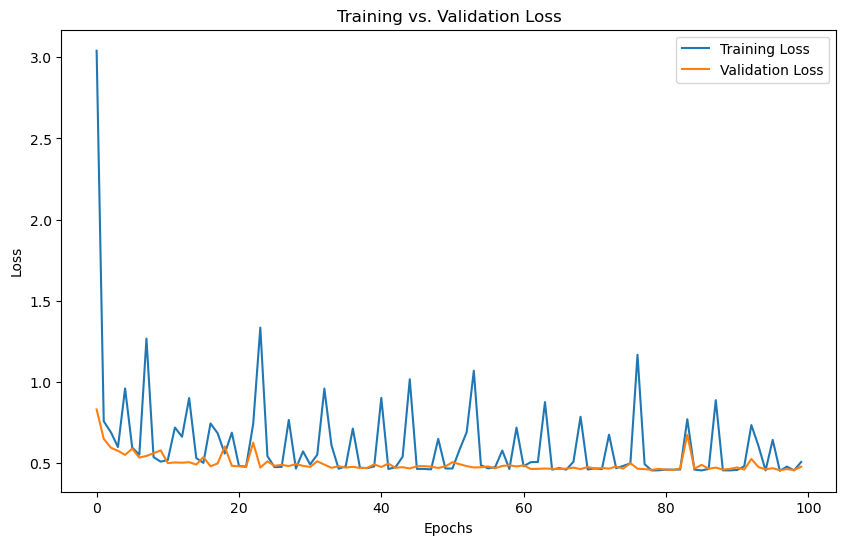

In [41]:
training_loss = history.history['loss']
validation_loss = history.history.get('val_loss') 

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

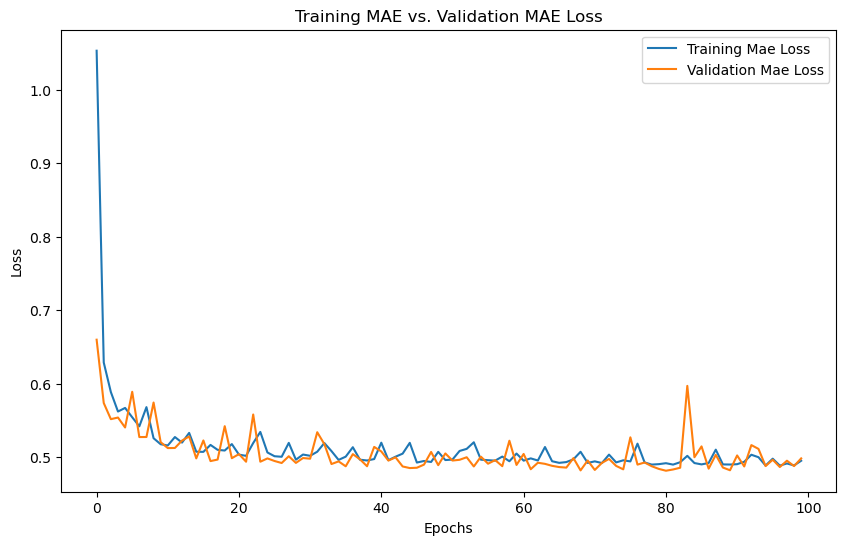

In [43]:
trainingmae_loss = history.history['mae']
validationmae_loss = history.history.get('val_mae') 

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(trainingmae_loss, label='Training Mae Loss')
plt.plot(validationmae_loss, label='Validation Mae Loss')
plt.title('Training MAE vs. Validation MAE Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Part 6

Create a second, deeper network with the following architecture:

- First hidden layer: 64 nodes with ReLU activation
- Second hidden layer: 128 nodes with ReLU activation
- Third hidden layer: 64 nodes with ReLU activation
- Output layer: [appropriate nodes for your classification task]

In [45]:
model2 = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(64, activation='relu'),      
    Dense(128, activation='relu'),     
    Dense(64, activation='relu'),      
    Dense(1, activation='linear')    
])

In [47]:
model2.compile(optimizer='adam',           
                     loss='mse',                   
                     metrics=['mae'])   

In [49]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

### Part 7

Add a `BatchNormalization` layer before the first dense layer and retrain the model with the same parameters as before.

##### Does this change anything?

In [51]:
BN_model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    BatchNormalization(),
    Dense(64, activation='relu'),      
    Dense(128, activation='relu'),     
    Dense(64, activation='relu'),      
    Dense(1, activation='linear')    
])

In [53]:
BN_model.compile(optimizer='adam',            
                        loss='mse',                 
                        metrics=['mae'])

In [55]:
history_bn = BN_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

In [56]:
BN_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,117 (199.68 KB)

 Trainable params: 17,035 (66.54 KB)

 Non-trainable params: 10 (40.00 B)

 Optimizer params: 34,072 (133.10 KB)

### Part 8

**Early Stopping**  

Do we need 100 epochs to effectively train the data?  

- Iterate to now include an `EarlyStopping` callback in your model above.  
- Set the `patience` equal to 5.  


In [63]:
#early stop and patience
early_stopping = EarlyStopping(monitor='val_loss',   
                               patience=5,          
                               restore_best_weights=True, 
                               verbose=1)

In [65]:
history_es = BN_model.fit(X_train, y_train, 
                                    epochs=100, 
                                    verbose=0, 
                                    validation_data=(X_test, y_test),  
                                    callbacks=[early_stopping])

Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.


**How many epochs do you think are appropriate?**

In [ ]:
# the best epochs are 6. 

### Part 9

**Dropout**  

- Add dropout layers to the model:
   - 5% dropout after the second layer
   - 20% dropout after the third layer
   - Train the model to compare **performance and convergence time**

In [67]:
model_dropout = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(128, activation='relu'),  
    Dense(64, activation='relu'), 
    Dropout(0.05),  # 5% dropout
    Dense(32, activation='relu'), 
    Dropout(0.20),  # 20% dropout
    Dense(1, activation='sigmoid')  
])

In [69]:
model_dropout.compile(optimizer='adam',           
                     loss='mse',                   
                     metrics=['mae'])       

hist_dp = model_dropout.fit(X_train, y_train,
                       epochs=100, verbose=0, 
                       validation_data=(X_test, y_test),  
                       callbacks=[early_stopping])

Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


### Part 9 - continued: RMSE vs. Baseline

Calculate and compare the RMSE of both the baseline model and your optimized model.

In [75]:
y_baseline = model.predict(X_test)[:, 0]
y_optimized = model_dropout.predict(X_test)[:, 0]

rmse_baseline = root_mean_squared_error(y_test, y_baseline)
rmse_optimized = root_mean_squared_error(y_test, y_optimized)


print(f"Baseline Model RMSE: {rmse_baseline}")
print(f"Optimized Model RMSE: {rmse_optimized}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step
Baseline Model RMSE: 0.6906251193560087
Optimized Model RMSE: 1.5663918460110486


### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  

- Create a model with the same architecture and dropout layers
- Add l2 regularization (0.01) to **each** dense layer
- Calculate the RMSE and compare it against the baseline model

In [77]:
model_regularized = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(128, activation='relu',kernel_regularizer=l2(0.01)),Dropout(0.05), 
    Dense(64, activation='relu',kernel_regularizer=l2(0.01)), Dropout(0.20),  
    Dense(32, activation='relu',kernel_regularizer=l2(0.01)),  
    Dense(1, activation='sigmoid') 
])


model_regularized.compile(optimizer='adam',           
                     loss='mse',                   
                     metrics=['mae'])  


hist_reg = model_regularized.fit(X_train, y_train,
                       epochs=100, verbose=0, 
                       validation_data=(X_test, y_test),  
                       callbacks=[early_stopping])

Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


### Part 11: Saving the Model

Save your best model in HDF5 format using `model.save(cali_housing.h5)`

In [83]:
from tensorflow.keras.models import save_model
#save_model(### your_model_name, 'cali_housing.h5')
#save_model(model_regularized, 'cali_housing.h5') # Warning : considered legacy 

#new format is .keras
model_regularized.save('cali_housing.keras')
